# Testing if Input Reduction for DNN enhances Performance

**Author**: Benjamin Urben<br>
**Email**: burben@student.ethz.ch / benjamin.urben@hotmail.ch<br>
**Context**: Master Thesis on "Use of Machine Learning in the Design and Analysis for Steel Connections"<br>
**Institution**: ETH Zürich, Institute of Structural Engineering (IBK)


## Setup

### Import

In [1]:
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

from scipy.stats import norm
from scipy import stats

import torch
import torch.nn as nn
import torch.optim as optim

from Settings import Directory, Plotting_Parameters

import DataReader
importlib.reload(DataReader)
from DataReader import DataReader

import DNN
importlib.reload(DNN)
from DNN import DNN

import warnings
warnings.filterwarnings('ignore')

### Directory

In [3]:
directory = Directory()
plot_params = Plotting_Parameters()

model_name = "DNN_Model_allFeatures"
load_model = False

DATA_FILE = r"Data\Knee_Connection_Output_red.csv"
MODEL_SAVE_PATH = os.path.join("Saved Models", model_name)

if not os.path.exists(MODEL_SAVE_PATH):
    os.mkdir(MODEL_SAVE_PATH)

MODEL_SAVE_FILE = os.path.join(MODEL_SAVE_PATH, f"{model_name}.pth")

Root Directory set to:  c:\Users\benja\OneDrive\Desktop\Masterarbeit\Code\10_Neural_Networks


## Define data and model

In [4]:
datareader = DataReader()

Root Directory set to:  c:\Users\benja\OneDrive\Desktop\Masterarbeit\Code\10_Neural_Networks
Knee_Connection_Output_red.csv
Knee_parallel_I_Off0_Output_red_Q1.xlsx
Knee_parallel_I_Output_Q1.xlsx
Knee_perpendicular_n.stiff_Off0_Output_red_Q1.xlsx
Knee_perpendicular_n.stiff_Output_red_Q1.xlsx
Knee_widener_I_Output_Off0_red_Q1.xlsx
Knee_widener_I_Output_red_Q1.xlsx


In [22]:
model = DNN()

model.config['epochs'] = 200
model.config['dropout_prob'] = 0.05
model.config['neurons_per_layer'] = [64, 32, 16]
model.config['seed'] = 42
model.config['learning_rate'] = 0.005

model.data['data_reduction_factor'] = 5

In [23]:
model_full_features = copy.deepcopy(model)
model_reduced_features = copy.deepcopy(model)

In [24]:
df_full = datareader.load("Knee_Connection_Output_red.csv")

df, model_full_features = datareader.reduce(df_full, model_full_features)

features_to_drop = ["Iy_x", "Wely_x", "Wply_x",
                    "Iy_y", "Wely_y", "Wply_y"]
df_full_reduced = df_full.drop(columns=features_to_drop)

df_reduced, model_reduced_features = datareader.reduce(df_full_reduced, model_reduced_features)

print(df.shape)
print(df_reduced.shape)

Knee_Connection_Output_red.csv: (714385, 53)
Current size: (714385, 53)
Processed column: d_wid
Current size: (363216, 53)
Processed column: t_fwid
Current size: (183926, 53)
Processed column: t_wwid
Current size: (93306, 53)
Processed column: fy_x
Current size: (23518, 53)
Processed column: fy_y
Current size: (714385, 47)
Processed column: d_wid
Current size: (363216, 47)
Processed column: t_fwid
Current size: (183926, 47)
Processed column: t_wwid
Current size: (93306, 47)
Processed column: fy_x
Current size: (23518, 47)
Processed column: fy_y
(23518, 53)
(23518, 47)


## Train

In [25]:
model_full_features.prepare_data(df)
model_full_features.build()
model_full_features.train()

Number of training samples: 18814
Number of validation samples: 2352
Number of testing samples: 2352
Epoch 1/200, Train Loss: 0.040340, Val Loss: 0.004015
Epoch 2/200, Train Loss: 0.003482, Val Loss: 0.002901
Epoch 3/200, Train Loss: 0.002550, Val Loss: 0.002244
Epoch 4/200, Train Loss: 0.001864, Val Loss: 0.001570
Epoch 5/200, Train Loss: 0.001286, Val Loss: 0.001210
Epoch 6/200, Train Loss: 0.000919, Val Loss: 0.000755
Epoch 7/200, Train Loss: 0.000666, Val Loss: 0.000591
Epoch 8/200, Train Loss: 0.000505, Val Loss: 0.000472
Epoch 9/200, Train Loss: 0.000414, Val Loss: 0.000405
Epoch 10/200, Train Loss: 0.000323, Val Loss: 0.000305
Epoch 11/200, Train Loss: 0.000288, Val Loss: 0.000270
Epoch 12/200, Train Loss: 0.000261, Val Loss: 0.000313
Epoch 13/200, Train Loss: 0.000255, Val Loss: 0.000256
Epoch 14/200, Train Loss: 0.000279, Val Loss: 0.000289
Epoch 15/200, Train Loss: 0.000257, Val Loss: 0.000206
Epoch 16/200, Train Loss: 0.000211, Val Loss: 0.000243
Epoch 17/200, Train Loss: 0.

In [26]:
model_reduced_features.prepare_data(df_reduced)
model_reduced_features.build()
model_reduced_features.train()

Number of training samples: 18814
Number of validation samples: 2352
Number of testing samples: 2352
Epoch 1/200, Train Loss: 0.072856, Val Loss: 0.005878
Epoch 2/200, Train Loss: 0.004621, Val Loss: 0.003377
Epoch 3/200, Train Loss: 0.002965, Val Loss: 0.002817
Epoch 4/200, Train Loss: 0.002447, Val Loss: 0.002355
Epoch 5/200, Train Loss: 0.002066, Val Loss: 0.002001
Epoch 6/200, Train Loss: 0.001696, Val Loss: 0.001721
Epoch 7/200, Train Loss: 0.001347, Val Loss: 0.001220
Epoch 8/200, Train Loss: 0.001049, Val Loss: 0.000935
Epoch 9/200, Train Loss: 0.000892, Val Loss: 0.001072
Epoch 10/200, Train Loss: 0.000779, Val Loss: 0.000792
Epoch 11/200, Train Loss: 0.000721, Val Loss: 0.000746
Epoch 12/200, Train Loss: 0.000677, Val Loss: 0.000724
Epoch 13/200, Train Loss: 0.000636, Val Loss: 0.000667
Epoch 14/200, Train Loss: 0.000575, Val Loss: 0.000582
Epoch 15/200, Train Loss: 0.000575, Val Loss: 0.000630
Epoch 16/200, Train Loss: 0.000565, Val Loss: 0.000544
Epoch 17/200, Train Loss: 0.

## Compare

**Monte Carlo Droput (MCD) mean score** 

On the **test set** perform $n$ number of forward passes with a given ratio (**droupout rate**) of randomly (**Bernoulli distribution**) deactived neurons and obtain a set of $n$ predictions $\hat{y}_i$.

Since $\hat{y}_i$ is a probabilistic value, you can calculate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ for all $n$ samples.

The mean $\hat{\mu}$ indicates the average prediction of the target on each data point of the **test set**. The closer the values of $\hat{\mu}$ to the **ground truth** of the **test set**, the better. The standard deviation $\hat{\sigma}$ indicates how much the predictions on each data point of the **test set** vary, in other words how **certain** a prediction is. A large standard deviation $\hat{\sigma}$ signifies an uncertain model, which is not favorable.

To mean $\hat{\sigma}$ and standard deviation $\hat{\mu}$ have the same dimesion as the **test set**, hence they will be further condensed into two singular metric scores.

**MCD Mean Score**

$MCDMS = 1/n\sum{(\hat{\mu_i}/y_{truth,i}-1)^2}$

**MCD Uncertainty Score**

$MCDUS = 1/n\sum{\hat{\sigma_i}^2}$

If **MCDMS** is close to 0, it indicates that the predictions resemble the grounth truth.

If **MCDUS** is close to 0, it indicates that the model has a low uncertainty.




In [127]:
def get_score(model,score):
    y_pred, test_loss = model.evaluate()
    metrics = model.get_metrics(y_pred.numpy())

    y_true = model.y_test.numpy()

    mcd_mean, mcd_std, _ = model.mc_dropout_uncertainty()

    mcd_mean_score = mean_squared_error(np.zeros(len(mcd_std)), mcd_mean / y_true - 1)
    mcd_std_score = mean_squared_error(np.zeros(len(mcd_std)), mcd_std)

    score['test_loss'].append(test_loss)

    score['MCDMS'].append(mcd_mean_score)
    score['MCDUS'].append(mcd_std_score)

    for metric in metrics:
        score[metric].append(metrics[metric])

    return score

score_comparison = {'model':['full features', 'reduced features'],
                    'test_loss':[],
                    'MCDMS':[],
                    'MCDUS':[],
                    'MSE':[],
                    'RMSE':[],
                    'MAE':[],
                    'R2':[]}

score_comparison = get_score(model_full_features,score_comparison)
score_comparison = get_score(model_reduced_features,score_comparison)

df_score_comparison = pd.DataFrame(score_comparison)

In [128]:
df_score_comparison

,model,test_loss,MCDMS,MCDUS,MSE,RMSE,MAE,R2
0,full features,0.00010,0.000265,0.004658,0.00010,0.010012,0.007014,0.993157
1,reduced features,0.00009,0.000404,0.010623,0.00009,0.009473,0.006462,0.993873


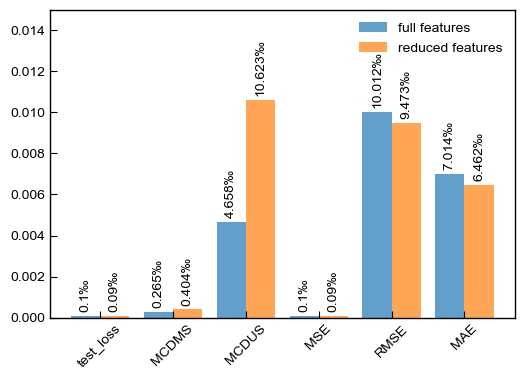

In [131]:
fig, ax = plt.subplots()

scores = df_score_comparison.columns[1:-1]
x = np.arange(len(scores))
width = 0.4

for i, row in df_score_comparison.iterrows():
    bars = ax.bar(x + (i * width), row[1:-1], width=width, alpha=0.7, label=row[0])

    # Add numbers on each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval+0.0002, f"{round(yval*1000, 3)}‰", ha='center', va='bottom',
                rotation=90)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(scores, rotation=45)
ax.legend()

plt.ylim(0, 0.015)
plt.show()